In [16]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import random

def acao(destino, custo):
    return {"destino": destino, "custo": custo}

estados_romenia = [
    {"estado": "Arad", "acoes": [acao("Zerind", 75), acao("Sibiu", 140), acao("Timisoara", 118)]},
    {"estado": "Zerind", "acoes": [acao("Arad", 75), acao("Oradea", 71)]},
    {"estado": "Timisoara", "acoes": [acao("Arad", 118), acao("Lugoj", 111)]},
    {"estado": "Sibiu","acoes": [acao("Arad", 140), acao("Oradea", 151), acao("Fagaras", 99), acao("Rimnicu Vilcea", 80)]},
    {"estado": "Oradea", "acoes": [acao("Zerind", 71), acao("Sibiu", 151)]},
    {"estado": "Lugoj", "acoes": [acao("Timisoara", 111), acao("Mehadia", 70)]},
    {"estado": "Mehadia", "acoes": [acao("Lugoj", 70), acao("Drobeta", 75)]},
    {"estado": "Drobeta", "acoes": [acao("Mehadia", 75), acao("Craiova", 120)]},
    {"estado": "Craiova", "acoes": [acao("Drobeta", 120), acao("Rimnicu Vilcea", 146), acao("Pitesti", 138)]},
    {"estado": "Rimnicu Vilcea", "acoes": [acao("Sibiu", 80), acao("Craiova", 146), acao("Pitesti", 97)]},
    {"estado": "Fagaras", "acoes": [acao("Sibiu", 99), acao("Bucharest", 211)]},
    {"estado": "Pitesti", "acoes": [acao("Rimnicu Vilcea", 97), acao("Craiova", 138), acao("Bucharest", 101)]},
    {"estado": "Giurgiu", "acoes": [acao("Bucharest", 90)]},
    {"estado": "Bucharest", "acoes": [acao("Fagaras", 211), acao("Pitesti", 101), acao("Giurgiu", 90), acao("Urziceni", 85)]},
    {"estado": "Urziceni", "acoes": [acao("Bucharest", 85), acao("Vaslui", 142), acao("Hirsova", 98)]},
    {"estado": "Hirsova", "acoes": [acao("Urziceni", 98), acao("Eforie", 86)]},
    {"estado": "Eforie", "acoes": [acao("Hirsova", 86)]},
    {"estado": "Vaslui", "acoes": [acao("Urziceni", 142), acao("Iasi", 92)]},
    {"estado": "Iasi", "acoes": [acao("Vaslui", 92), acao("Neamt", 87)]},
    {"estado": "Neamt", "acoes": [acao("Iasi", 87)]}
]

def ilustrar_percurso(percurso):
    for i in range(len(percurso)-1):
        print(percurso[i], end=" -> ")
    print(percurso[-1])

def get_estado(estado):
    for e in estados_romenia:
        if e["estado"] == estado:
            return e
    return None

def get_all_acoes(estado):
    return estado["acoes"]

def get_custo_total(percurso):
    custo_total = 0
    for i in range(len(percurso)-1):
        custo_total += get_custo(percurso[i], percurso[i+1])
    return custo_total

def get_all_destinos(estado):
    destinos = []
    for acao in get_all_acoes(get_estado(estado)):
        destinos.append(acao["destino"])
    return destinos

def get_custo(estado, destino):
    for acao in get_all_acoes(get_estado(estado)):
        if acao["destino"] == destino:
            return acao["custo"]
    return False

def dfs(start, goal):
    pilha = [start]
    algoritmo = []
    while pilha:
        estado_atual = pilha.pop()
        algoritmo.append(estado_atual)
        if estado_atual == goal:
            return algoritmo
        else:
            all_acoes = get_all_acoes(get_estado(estado_atual)).copy()
            random.shuffle(all_acoes)
            for acao in all_acoes:
                if acao["destino"] not in algoritmo and acao["destino"] not in pilha:
                    if acao["destino"] == goal:
                        pilha.append(acao["destino"])
                    else:
                        pilha.append(acao["destino"])
    return False

def bfs(start, goal):
    fila = [start]
    algoritmo = []
    while fila:
        estado_atual = fila.pop(0) #Simulando uma fila
        algoritmo.append(estado_atual)
        if estado_atual == goal:
            return algoritmo
        else:
            all_acoes = get_all_acoes(get_estado(estado_atual)).copy()
            random.shuffle(all_acoes)
            for acao in all_acoes:
                if acao["destino"] not in algoritmo and acao["destino"] not in fila:
                    if acao["destino"] == goal:
                        fila.insert(0, acao["destino"])
                    else:
                        fila.append(acao["destino"])
    return False

def get_viable_path_from_algo(algoritmo):
    '''
    Retorna um caminho viável a partir do resultado de um algoritmo de busca
    '''
    viable_path = []
    starting_point = algoritmo[0]
    ending_point = algoritmo[-1]
    viable_path.append(starting_point)
    ultimo_ponto_de_viabilidade = ending_point
    for i in range(1, len(algoritmo)-1):
        all_destinos = get_all_destinos(ultimo_ponto_de_viabilidade).copy()
        random.shuffle(all_destinos)
        if algoritmo[-1-i] in all_destinos:
            ultimo_ponto_de_viabilidade = algoritmo[-1-i]
            viable_path.insert(1, ultimo_ponto_de_viabilidade)
    viable_path.append(ending_point)
    return viable_path

def highlight_path(algoritmo, cost, viable_path):
    '''
    Função que desenha o grafo com os estados da Bulgária, o caminho percorrido pelo algoritmo até o ponto final, e um possível caminho viável.
    O custo se dá pelo somatório do custo de deslocamento para cada par de estados do possível caminho viável.
    '''
    G = nx.Graph()
    for estado in estados_romenia:
        for acao in estado["acoes"]:
            G.add_edge(estado["estado"], acao["destino"], weight=acao["custo"])
    pos = nx.kamada_kawai_layout(G)
    nx.draw(G, pos, with_labels=True, font_color='black', font_weight='bold', node_size=300, node_color='skyblue', font_size=8,
    width=1, edge_color='black', alpha=1, arrows=True, arrowstyle='->',  arrowsize=10,
    connectionstyle='arc3, rad=0.15', style='dashed', edge_cmap=plt.cm.Blues, edge_vmin=0, edge_vmax=1,
    linewidths=1, label='Romenia', font_family='sans-serif')
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=5, font_color="red", font_weight="bold", label_pos=0.5, rotate=False)
    #increase the size of the graph
    fig = plt.gcf()
    fig.set_size_inches(5, 5)
    fig.set_dpi(150)

    plt.text(-0.00, 0.99, f"Vermelho: Estados visitados pelo algoritmo\nVerde: Rota viável", fontsize=5, bbox=dict(facecolor='white'), horizontalalignment='left', verticalalignment='top', transform=plt.gca().transAxes)

    for estado in algoritmo:
        nx.draw_networkx_nodes(G, pos, nodelist=[estado], node_color='red', node_size=300, alpha=1)
        #Put numbers on top of the nodes according to the order they were visited
        plt.text(pos[estado][0]*1, pos[estado][1]-0.1, str(algoritmo.index(estado)), fontsize=5, fontweight='bold', color='white', horizontalalignment='center', verticalalignment='center',
        path_effects=[pe.withStroke(linewidth=2, foreground='red'), pe.Normal()])
    #Draw a square on the corner of the graph to show the cost
    for estado in viable_path:
        nx.draw_networkx_nodes(G, pos, nodelist=[estado], node_color='green', node_size=300, alpha=1)
        plt.text(pos[estado][0]*1, pos[estado][1]+0.1, str(viable_path.index(estado)), fontsize=5, fontweight='bold', color='black', horizontalalignment='center', verticalalignment='center',
        path_effects=[pe.withStroke(linewidth=2, foreground='green')],
        )

    plt.title(f"Custo total da rota viável: {cost}", fontsize=5, fontweight='bold', color='black', loc='left', horizontalalignment='left', verticalalignment='center')

def brute_force_lowest_cost(starting_point, ending_point, search_algo='dfs', max_iter=300):
    '''
    Função que realiza uma busca em força bruta para encontrar o menor custo de um caminho entre dois pontos.
    '''
    highest_cost = 0
    lowest_cost = 100000
    lowest_cost_path = []
    highest_cost_path = []
    for i in range(max_iter):
        if search_algo == 'dfs':
            algo = dfs(starting_point, ending_point)
        else:
            algo = bfs(starting_point, ending_point)
        viable_path = get_viable_path_from_algo(algo)
        custo_total = get_custo_total(viable_path)
        if custo_total < lowest_cost:
            lowest_cost = custo_total
            lowest_cost_path = viable_path
        if custo_total > highest_cost:
            highest_cost = custo_total
            highest_cost_path = viable_path
    return {'lowest_cost': lowest_cost, 'lowest_cost_path': lowest_cost_path, 'highest_cost': highest_cost, 'highest_cost_path': highest_cost_path}


In [17]:
dfs_algo = dfs("Arad", "Bucharest")
dfs_viable_path = get_viable_path_from_algo(dfs_algo)
dfs_custo_total = get_custo_total(dfs_viable_path)

In [18]:
bfs_algo = bfs("Arad", "Bucharest")
bfs_viable_path = get_viable_path_from_algo(bfs_algo)
bfs_custo_total = get_custo_total(bfs_viable_path)

In [19]:
ilustrar_percurso(dfs_viable_path)

Arad -> Timisoara -> Lugoj -> Mehadia -> Drobeta -> Craiova -> Rimnicu Vilcea -> Pitesti -> Bucharest


In [20]:
ilustrar_percurso(bfs_viable_path)

Arad -> Sibiu -> Fagaras -> Bucharest


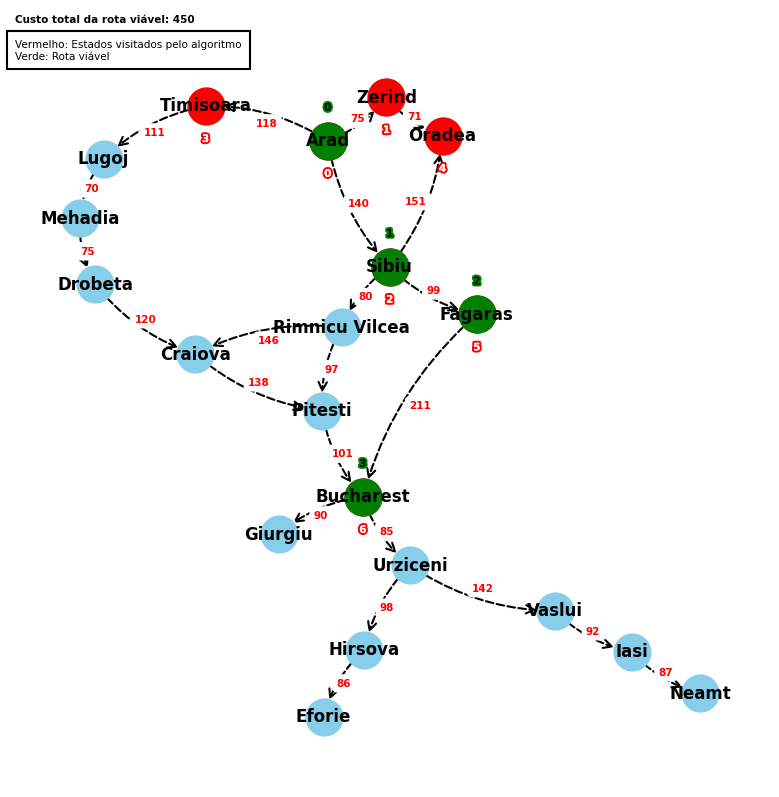

In [21]:
highlight_path(bfs_algo, bfs_custo_total, bfs_viable_path)

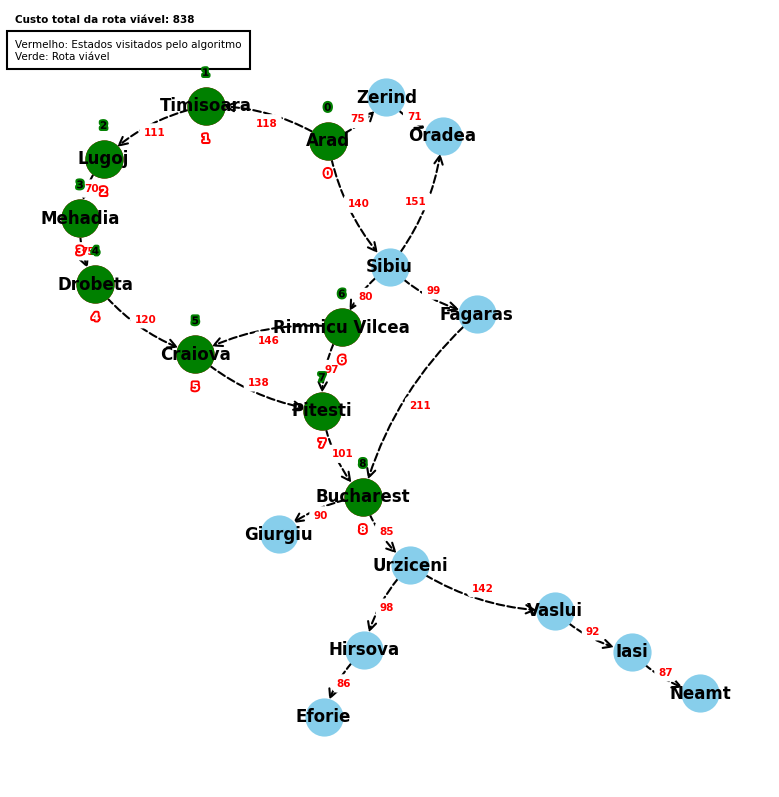

In [22]:
highlight_path(dfs_algo, dfs_custo_total, dfs_viable_path)

In [23]:
arad_bucharest_dfs_custos = brute_force_lowest_cost("Arad", "Bucharest", search_algo='dfs')
arad_bucharest_bfs_custos = brute_force_lowest_cost("Arad", "Bucharest", search_algo='bfs')

In [24]:
arad_bucharest_dfs_custos['lowest_cost_path']

['Arad', 'Sibiu', 'Rimnicu Vilcea', 'Pitesti', 'Bucharest']

O menor custo encontrado pelo algoritmo DFS foi de 418
O maior custo encontrado pelo algoritmo DFS foi de 838
O menor custo encontrado pelo algoritmo BFS foi de 450
O maior custo encontrado pelo algoritmo BFS foi de 450


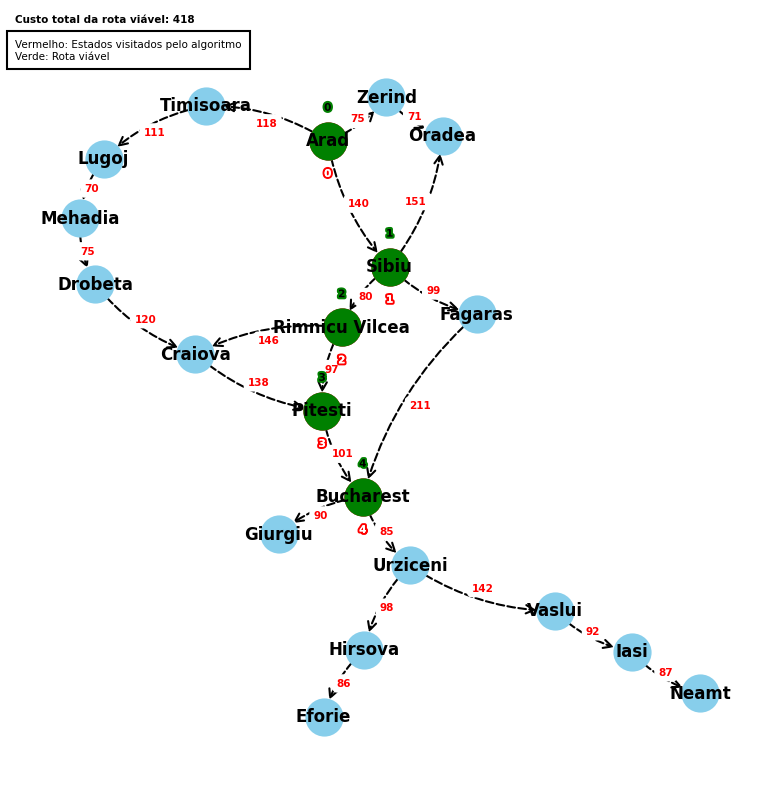

In [25]:
print(f"O menor custo encontrado pelo algoritmo DFS foi de {arad_bucharest_dfs_custos['lowest_cost']}")
print(f"O maior custo encontrado pelo algoritmo DFS foi de {arad_bucharest_dfs_custos['highest_cost']}")
print(f"O menor custo encontrado pelo algoritmo BFS foi de {arad_bucharest_bfs_custos['lowest_cost']}")
print(f"O maior custo encontrado pelo algoritmo BFS foi de {arad_bucharest_bfs_custos['highest_cost']}")

#O menor custo encontrado pelo algoritmo DFS foi de 418
highlight_path(arad_bucharest_dfs_custos['lowest_cost_path'], arad_bucharest_dfs_custos['lowest_cost'], arad_bucharest_dfs_custos['lowest_cost_path'])

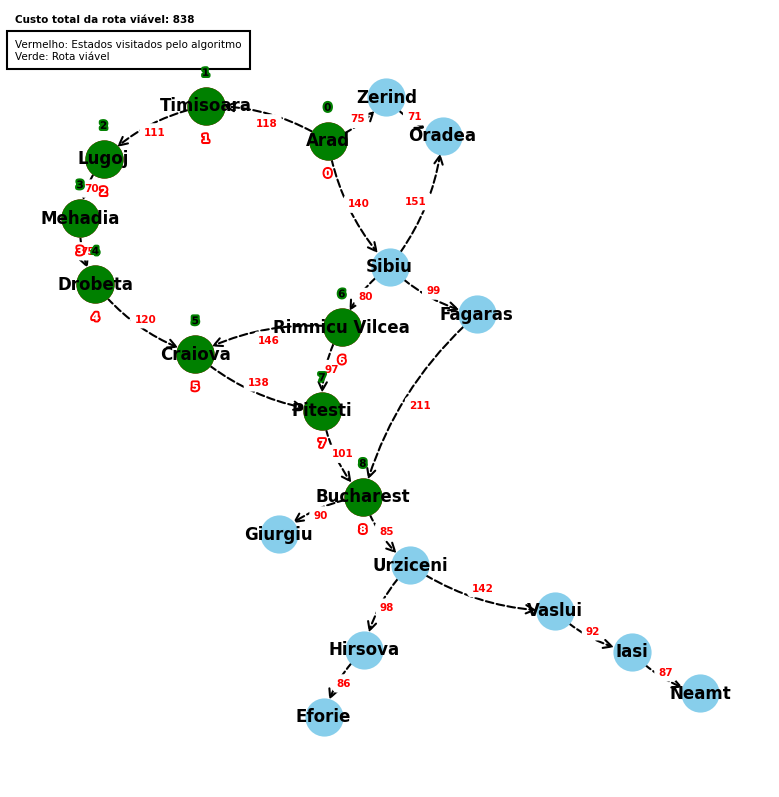

In [26]:
#O maior custo encontrado pelo algoritmo DFS foi de 838
highlight_path(arad_bucharest_dfs_custos['highest_cost_path'], arad_bucharest_dfs_custos['highest_cost'], arad_bucharest_dfs_custos['highest_cost_path'])

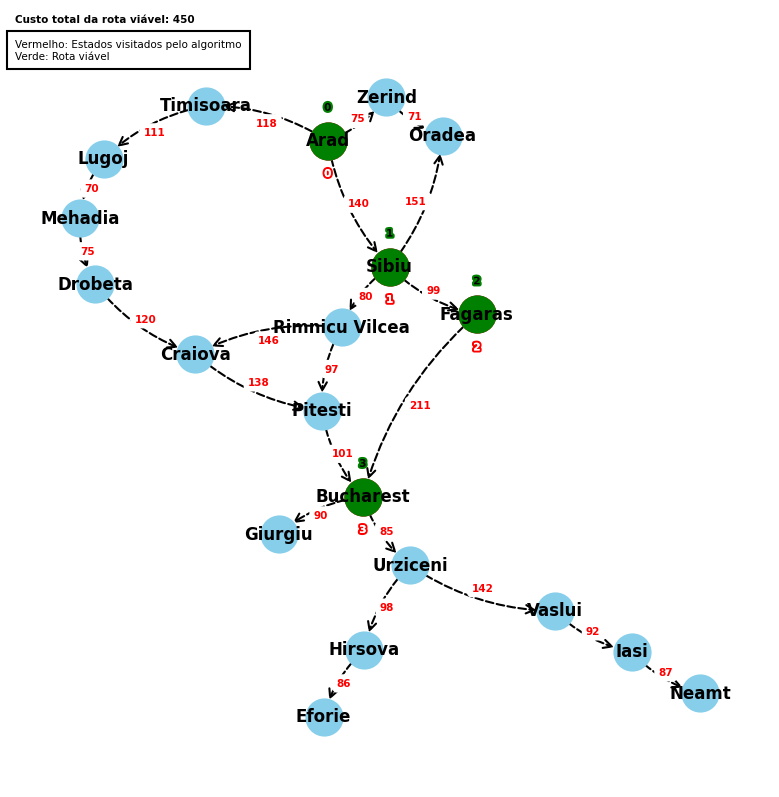

In [27]:
#O menor custo encontrado pelo algoritmo BFS foi de 450, e foi igual ao maior custo encontrado pelo algoritmo BFS.
highlight_path(arad_bucharest_bfs_custos['lowest_cost_path'], arad_bucharest_bfs_custos['lowest_cost'], arad_bucharest_bfs_custos['lowest_cost_path'])

<div class="alert alert-block alert-warning">
1. Com o espaço de estados das cidades da Romênia, escolha duas cidades para buscar uma
rota usando a implementação de busca em largura que foi vista nos vídeos. Mostre o
passo a passo da busca.
<div>

In [28]:
class No:
    def __init__(self, estado, custo, pai, acao):
        self.estado = estado
        self.custo = custo
        self.pai = pai
        self.acao = acao

    def __str__(self):
        return f'({self.estado}, {self.custo})'

    def __repr__(self):
        return self.__str__()

    def filhos(self, problema):
        espaco_acoes = next(e for e in problema.espaco_estados if e['estado'] == self.estado)

        resultado = []
        for acao in espaco_acoes['acoes']:
            filho = No(acao['destino'], self.custo + acao['custo'],
                       self, acao['destino'])
            resultado.append(filho)

        return resultado

    def constroi_solucao(self):
        no_atual = self
        solucao = [no_atual]
        while no_atual.pai != None:
            no_atual = no_atual.pai
            solucao.insert(0, no_atual)

        return solucao

class Problema:
    def __init__(self, espaco_estados, inicial, objetivo):
        self.espaco_estados = espaco_estados
        self.inicial = inicial
        self.objetivo = objetivo


BUSCA_INICIANDO = 0
BUSCA_FALHOU = 1
BUSCA_SUCESSO = 2
BUSCA_EM_CURSO = 3

class BuscaLargura:
    def __init__(self, problema):
        self.problema = problema
        self.fronteira = [problema.inicial]
        self.visitados = [problema.inicial.estado]
        self.solucao = []
        self.situacao = BUSCA_INICIANDO

    def executar(self):
        while self.situacao != BUSCA_FALHOU and self.situacao != BUSCA_SUCESSO:
            self.passo_busca()

        if self.situacao == BUSCA_FALHOU:
            print("Busca falhou")
        elif self.situacao == BUSCA_SUCESSO:
            print("Busca teve sucesso")
            print(f"Solucao: {self.solucao}")

        return

    def passo_busca(self):
        if (self.situacao == BUSCA_FALHOU):
            print("Busca falhou")
            return

        if (self.situacao == BUSCA_SUCESSO):
            print("Busca chegou ao objetivo com sucesso")
            return

        try:
            no = self.fronteira.pop(0)
        except IndexError:
            self.situacao = BUSCA_FALHOU
            return

        # faz teste do objetivo
        if self.problema.objetivo(no):
            self.situacao = BUSCA_SUCESSO
            self.solucao = no.constroi_solucao()
            return

        # obtem os filhos do no
        for filho in no.filhos(self.problema):
            if not (filho in self.fronteira) and not (filho.estado in self.visitados):
                self.fronteira.append(filho)
                self.visitados.append(filho.estado)
        return

def passo_a_passo(busca):
    print("----------------------------------------------------------------")
    print(f"Fronteira antes do passo: {busca.fronteira}")
    print(f"Visitados antes do passo: {busca.visitados}")
    busca.passo_busca()
    print(f"Fronteira depois do passo: {busca.fronteira}")
    print(f"Visitados depois do passo: {busca.visitados}")
    print("----------------------------------------------------------------")
    print("LOCALIZAÇÃO ATUAL: ", busca.visitados[-1])
    print("")
    
no_arad = No('Arad', 0, None, None)

problema_romenia = Problema(estados_romenia,
                            no_arad,
                            lambda no: no.estado == 'Bucharest')


<div class="alert alert-block alert-info">
Queremos encontrar um caminho válido, utilizando o algoritmo de busca em largura, entre Craiova e Arad da seguinte maneira:

Obs: Imagem gerada com a otimização de se um dos vizinhos do nó, for o destino final ir direto para esse nó, desligada
<div>

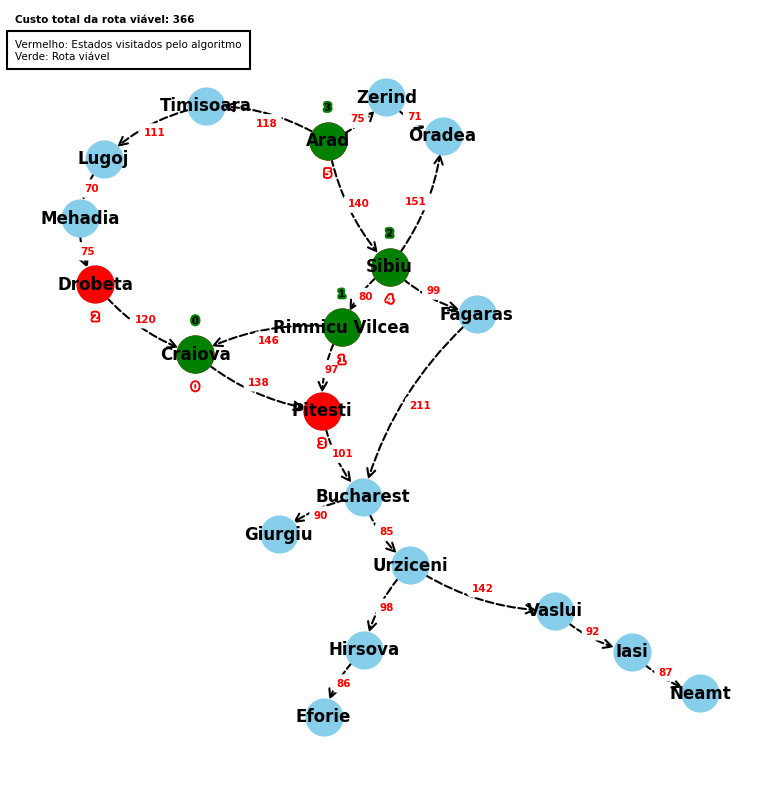

In [29]:
bfs_craiova_arad_algo = bfs("Craiova", "Arad") 
bfs_craiova_arad_path = get_viable_path_from_algo(bfs_craiova_arad_algo)
bfs_craiova_arad_custo_total = get_custo_total(bfs_craiova_arad_path)

highlight_path(bfs_craiova_arad_algo, bfs_craiova_arad_custo_total, bfs_craiova_arad_path)

<div class="alert alert-block alert-info">
Então é esperado que o algoritmo comece a buscar no primeiro nível de distância à Craiova (Pitesti, Rimnicu Vilcea e Drobeta), e em seguida no segundo nível de distância (Mehadia, Sibiu e Bucharest), para então ir para os nós que estão no terceiro nível de distância que é onde se encontra o destino final Arad
</div>

In [30]:
problema_craiova_arad = Problema(estados_romenia,
                                    No('Craiova', 0, None, None),
                                    lambda no: no.estado == 'Arad')
busca_largura_craiova_arad = BuscaLargura(problema_craiova_arad)

In [31]:
while busca_largura_craiova_arad.situacao != BUSCA_SUCESSO:
    passo_a_passo(busca_largura_craiova_arad)

----------------------------------------------------------------
Fronteira antes do passo: [(Craiova, 0)]
Visitados antes do passo: ['Craiova']
Fronteira depois do passo: [(Drobeta, 120), (Rimnicu Vilcea, 146), (Pitesti, 138)]
Visitados depois do passo: ['Craiova', 'Drobeta', 'Rimnicu Vilcea', 'Pitesti']
----------------------------------------------------------------
LOCALIZAÇÃO ATUAL:  Pitesti

----------------------------------------------------------------
Fronteira antes do passo: [(Drobeta, 120), (Rimnicu Vilcea, 146), (Pitesti, 138)]
Visitados antes do passo: ['Craiova', 'Drobeta', 'Rimnicu Vilcea', 'Pitesti']
Fronteira depois do passo: [(Rimnicu Vilcea, 146), (Pitesti, 138), (Mehadia, 195)]
Visitados depois do passo: ['Craiova', 'Drobeta', 'Rimnicu Vilcea', 'Pitesti', 'Mehadia']
----------------------------------------------------------------
LOCALIZAÇÃO ATUAL:  Mehadia

----------------------------------------------------------------
Fronteira antes do passo: [(Rimnicu Vilcea,

<div class="alert alert-block alert-warning">
2. Usando a implementação de busca em largura que foi vista no vídeo como base, crie uma
implementação similar para a busca em profundidade. O vídeo sobre busca em
profundidade explica qual alteração deve ser feita. Se o grupo preferir usar outra
linguagem, pode portar o código que foi desenvolvido nas aulas para outra linguagem, e
implementar a busca em profundidade. A implementação deve seguir o modelo da busca
em largura e ter uma função que permita executar apenas um passo da busca de cada vez.
<div>

In [32]:
dfs_craiova_arad_algo = dfs("Craiova", "Arad")
dfs_craiova_arad_path = get_viable_path_from_algo(dfs_craiova_arad_algo)
dfs_craiova_arad_custo_total = get_custo_total(dfs_craiova_arad_path)

ilustrar_percurso(dfs_craiova_arad_path)

Craiova -> Rimnicu Vilcea -> Sibiu -> Arad


<div class="alert alert-block alert-warning">
3. Usando a implementação de busca em profundidade desenvolvida para a questão anterior,
resolva o problema de busca de rotas na Romênia (de Arad a Bucareste), usando os dados
do livro e que estão disponíveis no código-fonte. Mostre o passo a passo da solução
através da busca em profundidade e como a sequência de nós explorados difere da busca
em largura.
</div>

In [33]:
import sys

def illustrate_stack(stack):
    for idx, estado in enumerate(reversed(stack)):
        print(" ╭――――――――――――――――――╮")
        print(f" │ {estado.center(15)}  │", end="")
        if idx == 0:
            print(" <--- Estado atual")
        else:
            print("")
        print(" ╰――――――――――――――――――╯")
        if idx == len(stack) - 1:
            print("└─────────┬───────────┘")
            print("        Pilha")
    print("")

def illustrate_queue(queue):
    for i in range(len(queue)):
        print(" ╭――――――――――――――――――╮")
        print(f" │ {queue[i].center(15)}  │", end="")
        if i == len(queue) - 1:
            print(" <--- Estado atual")
        else:
            print("")
        print(" ╰――――――――――――――――――╯")
        if i == len(queue) - 1:
            print("└─────────┬───────────┘")
            print("        Fila")
    print("")

def clear_output(wait=False):
    """Clear the output of the current cell receiving output.

    Parameters
    ----------
    wait : bool [default: false]
        Wait to clear the output until new output is available to replace it."""
    from IPython.core.interactiveshell import InteractiveShell
    if InteractiveShell.initialized():
        InteractiveShell.instance().display_pub.clear_output(wait)
    else:
        print('\033[2K\r', end='')
        sys.stdout.flush()
        print('\033[2K\r', end='')
        sys.stderr.flush()

def dfs(start, goal, illustrate=False):
    pilha = [start]
    algoritmo = []
    while pilha:
        if illustrate:
            clear_output(wait=True)
            illustrate_stack(pilha)
            input("Pressione ENTER para continuar...")
        estado_atual = pilha.pop()
        algoritmo.append(estado_atual)
        all_acoes = get_all_acoes(get_estado(estado_atual)).copy()
        random.shuffle(all_acoes)
        if goal in get_all_destinos(estado_atual):
            algoritmo.append(goal)
            return algoritmo
        for acao in all_acoes:
            if acao["destino"] not in algoritmo and acao["destino"] not in pilha:
                pilha.append(acao["destino"])
    return False

def bfs(start, goal, illustrate=False):
    fila = [start]
    algoritmo = []
    while fila:
        if illustrate:
            clear_output(wait=True)
            illustrate_queue(fila)
            input("Pressione ENTER para continuar...")
        estado_atual = fila.pop(0)
        algoritmo.append(estado_atual)
        all_acoes = get_all_acoes(get_estado(estado_atual)).copy()
        random.shuffle(all_acoes)
        if goal in get_all_destinos(estado_atual):
            algoritmo.append(goal)
            return algoritmo
        for acao in all_acoes:
            if acao["destino"] not in algoritmo and acao["destino"] not in fila:
                fila.append(acao["destino"])


In [34]:
dfs_arad_bucharest_algo = dfs("Arad", "Bucharest", illustrate=False)
dfs_arad_bucharest_path = get_viable_path_from_algo(dfs_arad_bucharest_algo)
dfs_arad_bucharest_custo_total = get_custo_total(dfs_arad_bucharest_path)

In [35]:
bfs_arad_bucharest_algo = bfs("Arad", "Bucharest", illustrate=False)
bfs_arad_bucharest_path = get_viable_path_from_algo(bfs_arad_bucharest_algo)
bfs_arad_bucharest_custo_total = get_custo_total(bfs_arad_bucharest_path)

In [36]:
ilustrar_percurso(dfs_arad_bucharest_path)
ilustrar_percurso(bfs_arad_bucharest_path)

Arad -> Timisoara -> Lugoj -> Mehadia -> Drobeta -> Craiova -> Pitesti -> Bucharest
Arad -> Sibiu -> Fagaras -> Bucharest


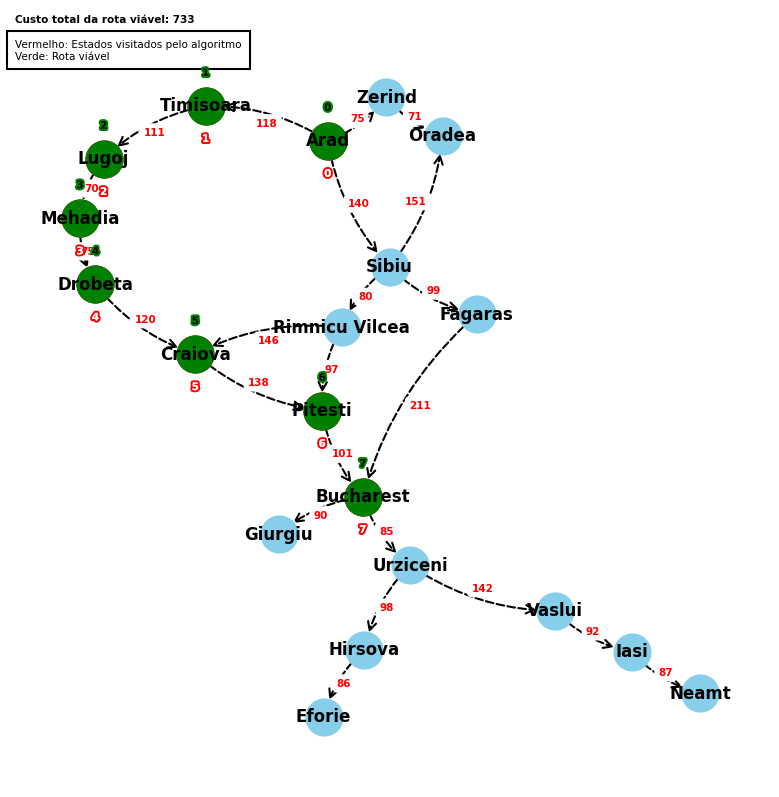

In [37]:
highlight_path(dfs_arad_bucharest_algo, dfs_arad_bucharest_custo_total, dfs_arad_bucharest_path)

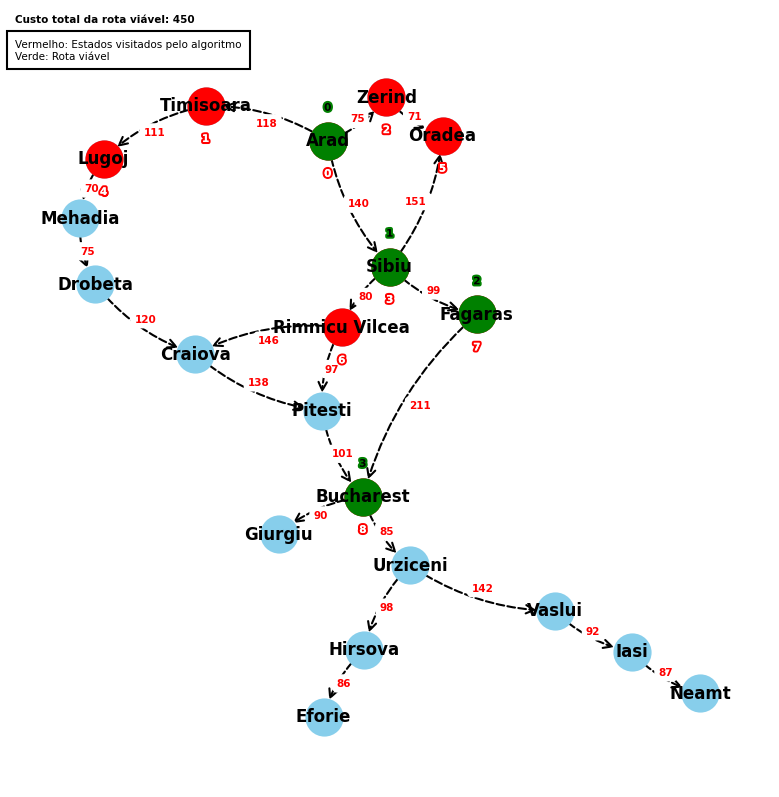

In [38]:
highlight_path(bfs_arad_bucharest_algo, bfs_arad_bucharest_custo_total, bfs_arad_bucharest_path)

<div class="alert alert-block alert-warning">
4. Escolha um outro problema que pode ser resolvido por busca (pode ser utilizado algum
dos problemas formulados na Atividade 5) e resolva-o utilizando busca em largura e busca
em profundidade. Mostre as mudanças que foram necessárias no código e o
passo-a-passo da solução.
</div>

<div class="alert alert-block alert-info">
É possível encontra a saída de um labirinto utilizando o algoritmo de busca em profundidade, para isso basta enxergar o labirinto como um grafo, onde cada nó é uma casa do labirinto, e então aplicar o algoritmo de busca em profundidade para encontrar um caminho entre a posição inicial e a posição final do labirinto.

As regras para o labirinto são as seguintes:
    <ul>
        <li>O labirinto é representado por uma matriz de caracteres, onde cada caractere representa uma casa do labirinto</li>
        <li>Não é possível se movimentar na diagonal</li>
        <li>O caractere <b>'.'</b>, ou o emoji ⬜, representam uma <b>casa vazia</b></li>
        <li>O caractere '<b>#</b>', ou o emoji ⬛, representam uma <b>casa bloqueada</b></li>
        <li>O caractere '<b>E</b>', ou o emoji 🟥, representam a <b>posição final (saída)</b> do labirinto</li>
        <li>O caractere '<b>S</b>', ou o emoji 🟩, representam a <b>posição inicial</b> do labirinto</li>
        <li>O caractere '<b>X</b>', ou o emoji 🟦, representam o <b>caminho já andado</b> pelo personagem</li>
        <li>O caractere '<b>P</b>', ou o emoji 👾, representam a <b>posição atual</b> do personagem</li>
    </ul>

O algoritmo dfs para encontrar a saída do labirinto(`labyrinth_dfs`) é essencialmente idêntico ao construído anteriormente para o problema anterior da Romenia(`dfs`), sendo a maior diferença entre eles as suas funções auxiliares, especialmente as funções para enxergar os caminhos possíveis, no caso da Romenia os dados dos estados já estavam montados, indicando quais eram os possiveis caminhos que poderiam ser seguidos a partir de um determinado nó, já no problema do labirinto é necessário extrapolar quais casas se conectam com quais outras casas. As conexões entre as casas foram determinadas através das funções `get_adjacent_locations` e `get_valid_moves`.
    
</div>


In [39]:
#Algoritmo de busca em profundidade utilizado para encontrar o caminho mais curto entre dois estados
def dfs(start, goal, illustrate=False):
    pilha = [start]
    algoritmo = []
    while pilha:
        if illustrate:
            clear_output(wait=True)
            illustrate_stack(pilha)
            input("Pressione ENTER para continuar...")
        estado_atual = pilha.pop()
        algoritmo.append(estado_atual)
        all_acoes = get_all_acoes(get_estado(estado_atual)).copy()
        random.shuffle(all_acoes)
        if goal in get_all_destinos(estado_atual):
            algoritmo.append(goal)
            return algoritmo
        for acao in all_acoes:
            if acao["destino"] not in algoritmo and acao["destino"] not in pilha:
                pilha.append(acao["destino"])
    return False

def brute_force_lowest_cost(starting_point, max_iter=1000):
    '''
    Função que realiza uma busca em força bruta para encontrar o menor custo de um caminho entre dois pontos.
    '''
    def dfs_completo(start):
        pilha = [start]
        algoritmo = []
        while pilha:
            estado_atual = pilha.pop()
            algoritmo.append(estado_atual)
            all_acoes = get_all_acoes(get_estado(estado_atual)).copy()
            random.shuffle(all_acoes)
            for acao in all_acoes:
                if acao["destino"] not in algoritmo and acao["destino"] not in pilha:
                    pilha.append(acao["destino"])
        return algoritmo

    highest_cost = 0
    lowest_cost = 100000
    lowest_cost_path = []
    highest_cost_path = []
    for i in range(max_iter):
        algo = dfs_completo(starting_point)
        custo_total = get_custo_total(algo)
        if custo_total < lowest_cost:
            lowest_cost = custo_total
            lowest_cost_path = algo
        if custo_total > highest_cost:
            highest_cost = custo_total
            highest_cost_path = algo
    return {'lowest_cost': lowest_cost, 'lowest_cost_path': lowest_cost_path, 'highest_cost': highest_cost, 'highest_cost_path': highest_cost_path}


In [40]:

maze = [["S", ".", ".", "#", ".", ".", "."],
        [".", "#", ".", ".", ".", "#", "."],
        [".", "#", ".", ".", ".", ".", "."],
        [".", ".", "#", "#", ".", ".", "."],
        ["#", ".", "#", "E", ".", "#", "."]]
        #S = Start, E = End, # = Rock, . = Empty

def print_location_in_maze(location, path, emoji=False):
    '''
    Função que imprime o labirinto com a localização atual do personagem.
    '''
    print("•───────────•✤•───────────•")
    print("")
    for i in range(len(maze)):
        for j in range(len(maze[i])):
            if i == location[0] and j == location[1]:
                if emoji:
                    print("👾", end=" ")
                else:
                    print("P", end=" ")
            else:
                if emoji:
                    if maze[i][j] == "#":
                        print("⬛", end=" ")
                    elif maze[i][j] == "S":
                        print("🟩", end=" ")
                    elif maze[i][j] == "E":
                        print("🟥", end=" ")
                    #Check if the current location is in the path
                    elif [i, j] in path:
                        print("🟦", end=" ")
                    else:
                        print("⬜", end=" ")
                else:
                    if [i, j] in path:
                        print("X", end=" ")
                    
        print("")
    print("•───────────•✤•───────────•")

def get_adjacent_locations(location):
    '''
    Função que retorna as posições adjacentes à localização atual.
    '''
    adjacent_locations = []
    if location[0] > 0:
        adjacent_locations.append([location[0]-1, location[1]])
    if location[0] < len(maze)-1:
        adjacent_locations.append([location[0]+1, location[1]])
    if location[1] > 0:
        adjacent_locations.append([location[0], location[1]-1])
    if location[1] < len(maze[0])-1:
        adjacent_locations.append([location[0], location[1]+1])
    return adjacent_locations

def get_valid_moves(location):
    '''
    Função que retorna as posições adjacentes à localização atual que não são rochas.
    '''
    adjacent_locations = get_adjacent_locations(location)
    valid_moves = []
    for adjacent_location in adjacent_locations:
        if maze[adjacent_location[0]][adjacent_location[1]] != "#":
            valid_moves.append(adjacent_location)
    return valid_moves

def labyrinth_dfs(illustrate=False):
    for i in range(len(maze)):
        for j in range(len(maze[i])):
            if maze[i][j] == "S":
                starting_point = [i, j]
            if maze[i][j] == "E":
                ending_point = [i, j]
    pilha = [starting_point]
    algoritmo = []
    while pilha:
        location = pilha.pop()
        algoritmo.append(location)
        if illustrate:
            print_location_in_maze(location, algoritmo, emoji=True)
        if ending_point in get_valid_moves(location):
            algoritmo.append(ending_point)
            if illustrate:
                print_location_in_maze(ending_point, algoritmo, emoji=True)
            return algoritmo
        valid_moves = get_valid_moves(location)
        random.shuffle(valid_moves)
        for move in valid_moves:
            if move not in algoritmo and move not in pilha:
                pilha.append(move)
    return False

def get_viable_labyrinth_path_from_dfs(algo_path):
    '''
    Função que retorna um caminho válido do labirinto a partir da busca em profundidade.
    '''
    viable_path = []
    starting_point = [0,0]
    ending_point = [4,3]
    viable_path.append(starting_point)
    ultimo_ponto_de_viabilidade = ending_point
    for i in range(1, len(algo_path)-1):
        valid_moves = get_valid_moves(ultimo_ponto_de_viabilidade)
        if algo_path[-1-i] in valid_moves:
            ultimo_ponto_de_viabilidade = algo_path[-1-i]
            viable_path.insert(1, ultimo_ponto_de_viabilidade)
    viable_path.append(ending_point)
    return viable_path

def brute_force_most_viable_path(max_iter = 1000):
    shortest_path = []
    shortest_path_length = 100000
    for i in range(max_iter):
        algo = labyrinth_dfs()
        viable_path = get_viable_labyrinth_path_from_dfs(algo)
        if len(viable_path) < shortest_path_length:
            shortest_path_length = len(viable_path)
            shortest_path = viable_path
    return shortest_path

In [41]:
lab_algo_path = labyrinth_dfs(illustrate=True)

•───────────•✤•───────────•

👾 ⬜ ⬜ ⬛ ⬜ ⬜ ⬜ 
⬜ ⬛ ⬜ ⬜ ⬜ ⬛ ⬜ 
⬜ ⬛ ⬜ ⬜ ⬜ ⬜ ⬜ 
⬜ ⬜ ⬛ ⬛ ⬜ ⬜ ⬜ 
⬛ ⬜ ⬛ 🟥 ⬜ ⬛ ⬜ 
•───────────•✤•───────────•
•───────────•✤•───────────•

🟩 ⬜ ⬜ ⬛ ⬜ ⬜ ⬜ 
👾 ⬛ ⬜ ⬜ ⬜ ⬛ ⬜ 
⬜ ⬛ ⬜ ⬜ ⬜ ⬜ ⬜ 
⬜ ⬜ ⬛ ⬛ ⬜ ⬜ ⬜ 
⬛ ⬜ ⬛ 🟥 ⬜ ⬛ ⬜ 
•───────────•✤•───────────•
•───────────•✤•───────────•

🟩 ⬜ ⬜ ⬛ ⬜ ⬜ ⬜ 
🟦 ⬛ ⬜ ⬜ ⬜ ⬛ ⬜ 
👾 ⬛ ⬜ ⬜ ⬜ ⬜ ⬜ 
⬜ ⬜ ⬛ ⬛ ⬜ ⬜ ⬜ 
⬛ ⬜ ⬛ 🟥 ⬜ ⬛ ⬜ 
•───────────•✤•───────────•
•───────────•✤•───────────•

🟩 ⬜ ⬜ ⬛ ⬜ ⬜ ⬜ 
🟦 ⬛ ⬜ ⬜ ⬜ ⬛ ⬜ 
🟦 ⬛ ⬜ ⬜ ⬜ ⬜ ⬜ 
👾 ⬜ ⬛ ⬛ ⬜ ⬜ ⬜ 
⬛ ⬜ ⬛ 🟥 ⬜ ⬛ ⬜ 
•───────────•✤•───────────•
•───────────•✤•───────────•

🟩 ⬜ ⬜ ⬛ ⬜ ⬜ ⬜ 
🟦 ⬛ ⬜ ⬜ ⬜ ⬛ ⬜ 
🟦 ⬛ ⬜ ⬜ ⬜ ⬜ ⬜ 
🟦 👾 ⬛ ⬛ ⬜ ⬜ ⬜ 
⬛ ⬜ ⬛ 🟥 ⬜ ⬛ ⬜ 
•───────────•✤•───────────•
•───────────•✤•───────────•

🟩 ⬜ ⬜ ⬛ ⬜ ⬜ ⬜ 
🟦 ⬛ ⬜ ⬜ ⬜ ⬛ ⬜ 
🟦 ⬛ ⬜ ⬜ ⬜ ⬜ ⬜ 
🟦 🟦 ⬛ ⬛ ⬜ ⬜ ⬜ 
⬛ 👾 ⬛ 🟥 ⬜ ⬛ ⬜ 
•───────────•✤•───────────•
•───────────•✤•───────────•

🟩 👾 ⬜ ⬛ ⬜ ⬜ ⬜ 
🟦 ⬛ ⬜ ⬜ ⬜ ⬛ ⬜ 
🟦 ⬛ ⬜ ⬜ ⬜ ⬜ ⬜ 
🟦 🟦 ⬛ ⬛ ⬜ ⬜ ⬜ 
⬛ 🟦 ⬛ 🟥 ⬜ ⬛ ⬜ 
•───────────•✤•───────────•
•───────────•✤•───────────•

🟩 🟦 👾 ⬛ ⬜ ⬜ ⬜ 
🟦 ⬛ ⬜ ⬜ ⬜ ⬛ ⬜ 
🟦 ⬛ ⬜ ⬜ ⬜ ⬜ ⬜ 
🟦 

In [42]:
viable_path = get_viable_labyrinth_path_from_dfs(lab_algo_path)

In [43]:
brute_force = brute_force_most_viable_path(max_iter = 1000)

In [44]:
for idx, loc in enumerate(brute_force):
    print(f"Passo {idx}")
    print_location_in_maze(loc, brute_force[:idx], emoji=True)
    print("")

Passo 0
•───────────•✤•───────────•

👾 ⬜ ⬜ ⬛ ⬜ ⬜ ⬜ 
⬜ ⬛ ⬜ ⬜ ⬜ ⬛ ⬜ 
⬜ ⬛ ⬜ ⬜ ⬜ ⬜ ⬜ 
⬜ ⬜ ⬛ ⬛ ⬜ ⬜ ⬜ 
⬛ ⬜ ⬛ 🟥 ⬜ ⬛ ⬜ 
•───────────•✤•───────────•

Passo 1
•───────────•✤•───────────•

🟩 👾 ⬜ ⬛ ⬜ ⬜ ⬜ 
⬜ ⬛ ⬜ ⬜ ⬜ ⬛ ⬜ 
⬜ ⬛ ⬜ ⬜ ⬜ ⬜ ⬜ 
⬜ ⬜ ⬛ ⬛ ⬜ ⬜ ⬜ 
⬛ ⬜ ⬛ 🟥 ⬜ ⬛ ⬜ 
•───────────•✤•───────────•

Passo 2
•───────────•✤•───────────•

🟩 🟦 👾 ⬛ ⬜ ⬜ ⬜ 
⬜ ⬛ ⬜ ⬜ ⬜ ⬛ ⬜ 
⬜ ⬛ ⬜ ⬜ ⬜ ⬜ ⬜ 
⬜ ⬜ ⬛ ⬛ ⬜ ⬜ ⬜ 
⬛ ⬜ ⬛ 🟥 ⬜ ⬛ ⬜ 
•───────────•✤•───────────•

Passo 3
•───────────•✤•───────────•

🟩 🟦 🟦 ⬛ ⬜ ⬜ ⬜ 
⬜ ⬛ 👾 ⬜ ⬜ ⬛ ⬜ 
⬜ ⬛ ⬜ ⬜ ⬜ ⬜ ⬜ 
⬜ ⬜ ⬛ ⬛ ⬜ ⬜ ⬜ 
⬛ ⬜ ⬛ 🟥 ⬜ ⬛ ⬜ 
•───────────•✤•───────────•

Passo 4
•───────────•✤•───────────•

🟩 🟦 🟦 ⬛ ⬜ ⬜ ⬜ 
⬜ ⬛ 🟦 ⬜ ⬜ ⬛ ⬜ 
⬜ ⬛ 👾 ⬜ ⬜ ⬜ ⬜ 
⬜ ⬜ ⬛ ⬛ ⬜ ⬜ ⬜ 
⬛ ⬜ ⬛ 🟥 ⬜ ⬛ ⬜ 
•───────────•✤•───────────•

Passo 5
•───────────•✤•───────────•

🟩 🟦 🟦 ⬛ ⬜ ⬜ ⬜ 
⬜ ⬛ 🟦 ⬜ ⬜ ⬛ ⬜ 
⬜ ⬛ 🟦 👾 ⬜ ⬜ ⬜ 
⬜ ⬜ ⬛ ⬛ ⬜ ⬜ ⬜ 
⬛ ⬜ ⬛ 🟥 ⬜ ⬛ ⬜ 
•───────────•✤•───────────•

Passo 6
•───────────•✤•───────────•

🟩 🟦 🟦 ⬛ ⬜ ⬜ ⬜ 
⬜ ⬛ 🟦 ⬜ ⬜ ⬛ ⬜ 
⬜ ⬛ 🟦 🟦 👾 ⬜ ⬜ 
⬜ ⬜ ⬛ ⬛ ⬜ ⬜ ⬜ 
⬛ ⬜ ⬛ 🟥 ⬜ ⬛ ⬜ 
•───────────•✤•───────────•

Passo 7
•────